In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
import ipywidgets as widgets

Zasymuluj wahadlo matematyczne rozwiazując numerycznie rownanie różniczkowe je opisujace
(rownież dla dużych wychyleń). 

$$
\frac{d^2x}{dt^2} + \frac{g}{l} sin(x) = 0
$$

In [4]:
g = 9.81
l = 1

In [5]:
def pendulum(initial_theta, time, initial_omega=0, time_step=0.01, g=g, l=l):
    theta = initial_theta
    omega = initial_omega
    t = 0
    while(t < time):
        a = -(g / l) * np.sin(theta)
        omega += a * time_step
        theta += omega * time_step + a * (time_step ** 2) /2
        t += time_step
    return theta

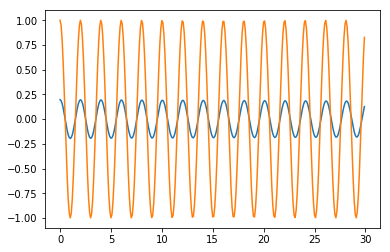

In [7]:
omega = 1 / np.sqrt(l /g) # = 2*Pi / T (where T = 2*Pi sqrt(l/g))
step = 0.001
T = np.arange(0,30,0.1)
Theta = np.array([pendulum(np.pi / 16, t, time_step=step) for t in T])
actual_theta = np.cos(omega * T)
plt.plot(T, Theta)
plt.plot(T, actual_theta)
plt.show()

In [66]:
def demonstrate_pendulum(initial_theta, time, initial_omega=0, time_step_magn=-2, g=9.8, l=1):
    time_step = 10**time_step_magn
    theta = pendulum(initial_theta, time, initial_omega, time_step, g)
    x = np.sin(theta)
    y = - np.sqrt(l**2 - x**2)
    line_x = np.linspace(x,0)
    line_y = np.linspace(y,0)
    plt.scatter(x,y)
    plt.plot(line_x, line_y, color='black')
    plt.scatter([0],[0])
    plt.axis((-1, 1, -2, 0.5))
    
    plt.show()
    

In [4]:
interact(demonstrate_pendulum, 
         time=widgets.FloatSlider(min=0, max=1000, value=0, step=0.01), 
         initial_theta=widgets.FloatSlider(min=0, max=2*np.pi, value=np.pi/4, step=0.01),
        time_step_magn=widgets.IntSlider(min=-5, max=5, value=-2)
        )

interactive(children=(FloatSlider(value=0.7853981633974483, description='initial_theta', max=6.283185307179586, step=0.01), FloatSlider(value=0.0, description='time', max=1000.0, step=0.01), IntSlider(value=0, description='initial_omega', max=1), IntSlider(value=-2, description='time_step_magn', max=5, min=-5), FloatSlider(value=9.8, description='g', max=29.400000000000002, min=-9.8), IntSlider(value=1, description='l', max=3, min=-1), Output()), _dom_classes=('widget-interact',))

<function __main__.demonstrate_pendulum>

Zasymuluj układ grawitacyjny : gwiazda i przylatujace cialo niebieskie z pewna (zadawana
przez uzytkownika) prędkością poczatkową.

In [53]:
@np.vectorize
def g(r, G=1, M=1, r_max=1):
    return (G * M) / r**2 if r > r_max else ((G * M) / r_max**2) * (r / r_max)



array(0.0)

In [98]:
def gravity(time, initial_pos, M=0, initial_v=0, time_step=0.1, r_max=1):
    t = 0
    x = initial_pos
    v = initial_v
    r = np.abs(x)
    a = - g(r, M=M, r_max=r_max) * (x / r)
    X = [x]
    while(t < time):
        r = np.abs(x)
        a = - g(r, M=M, r_max=r_max) * (x / r)
        v += a * time_step
        x += v * time_step + a * ((time_step ** 2) / 2)
        t += time_step
        X.append(x)
    return np.array(X), v, a

In [101]:
def demonstrate_gravity(time, in_x, in_y, in_vx, in_vy, time_step_magn, M, r_max):
    pos = in_x + in_y * 1j
    v = in_vx + in_vy * 1j
    time_step = 10**time_step_magn
    pos, v, a = gravity(time, pos, initial_v=v, M=M, r_max=r_max)

    X = np.real(pos)
    Y = np.imag(pos)
    x = X[-1]
    y = Y[-1]
    line_x = np.linspace(x,0)
    line_y = np.linspace(y,0)
    v_x = np.real(v)
    v_y = np.imag(v)
    line_v_x = np.linspace(x, x + v_x)
    line_v_y = np.linspace(y, y + v_y)
    a_x = np.real(a)
    a_y = np.imag(a)
    line_a_x = np.linspace(x, x + a_x)
    line_a_y = np.linspace(y, y + a_y)
    
    print(x, y)
    print(v) 
    print(a) 
    ax=plt.gca()
    ax.add_patch(plt.Circle((0,0), r_max, color='r', fill=False))    
    plt.scatter([0],[0], color='red')

    plt.scatter(x,y, color='blue')
    plt.plot(X, Y, color='blue')
    plt.plot(line_v_x, line_v_y, color='green')
    plt.scatter([x + v_x], [y + v_y], color='green', marker='^')
    plt.plot(line_a_x, line_a_y, color='purple')
    plt.scatter([x + a_x], [y + a_y], color='purple', marker='^')
    
    plt.axis((-5, 5, -5, 5))
    
    plt.show()
    

In [102]:
interact(demonstrate_gravity, 
         time=widgets.FloatSlider(min=0, max=1000, value=0, step=0.1), 
        time_step_magn=widgets.IntSlider(min=-5, max=5, value=-3),
         in_x=widgets.FloatSlider(min=-5, max=5, value=2, step=0.1), 
         in_y=widgets.FloatSlider(min=-5, max=5, value=2, step=0.1), 
         in_vx=widgets.FloatSlider(min=-5, max=5, value=-0.5, step=0.1), 
         in_vy=widgets.FloatSlider(min=-5, max=5, value=0.5, step=0.1),
         M=widgets.FloatSlider(min=0, max=10, value=1, step=0.1),
         r_max=widgets.FloatSlider(min=0, max=2, value=1, step=0.1)
        )

interactive(children=(FloatSlider(value=0.0, description='time', max=1000.0), FloatSlider(value=2.0, description='in_x', max=5.0, min=-5.0), FloatSlider(value=2.0, description='in_y', max=5.0, min=-5.0), FloatSlider(value=-0.5, description='in_vx', max=5.0, min=-5.0), FloatSlider(value=0.5, description='in_vy', max=5.0, min=-5.0), IntSlider(value=-3, description='time_step_magn', max=5, min=-5), FloatSlider(value=1.0, description='M', max=10.0), FloatSlider(value=1.0, description='r_max', max=2.0), Output()), _dom_classes=('widget-interact',))

<function __main__.demonstrate_gravity>

In [73]:
plt.Circle((0,0), 1, color='r')    
plt.show()
